<a href="https://colab.research.google.com/github/Arpitkamal/Deep-Learning---Deep-Convolutional-Neural-Networks/blob/master/BatchNorm_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline



1.   Load dataset and visualise
2.   Add batchnorm layers
3.   Comparison with and without batchborm layers
4.   Add dropout layer
5.   Comparison with and without dropout layer





In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision 
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset and visualisation

In [2]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True,
                                      transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
batch_size = 4 

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
2


In [6]:
def imshow(img, title):

  plt.figure(figsize=(batch_size * 4, 4))
  plt.axis('off')
  plt.imshow(np.transpose(img, (1, 2, 0)))
  plt.title(title)
  plt.show()

In [7]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))

  img = torchvision.utils.make_grid(images)
  imshow(img, title=[str(x.item()) for x in labels])

  return images, labels

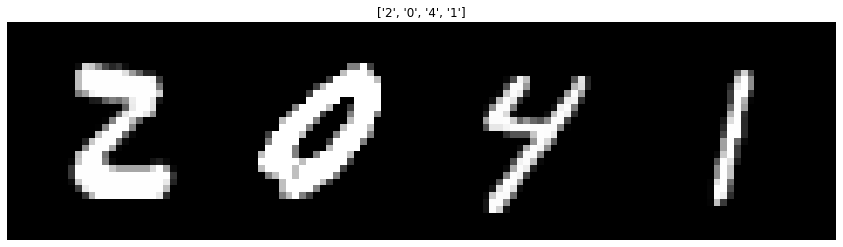

In [8]:
images, labels = show_batch_images(trainloader)

# Batchnorm

In [9]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),
        nn.ReLU(),
        nn.Linear(48, 24),
        nn.ReLU(),
        nn.Linear(24, 10)
    )

  def forward(self, x):
    x = x.view(x.size(0), -1) #flatten the input 28*28=784
    x = self.classifier(x)
    return x  

In [10]:
class MyNetBM(nn.Module):
  def __init__(self):
    super(MyNetBM, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),
        nn.BatchNorm1d(48),
        nn.ReLU(),
        nn.Linear(48, 24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24, 10)
    )

  def forward(self, x):
    x = x.view(x.size(0), -1) #flatten the input 28*28=784
    x = self.classifier(x)
    return x  

In [35]:
model = MyNet()
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)


In [12]:
model_bn = MyNetBM()
print(model_bn)

MyNetBM(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [13]:
batch_size = 512

In [14]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [15]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

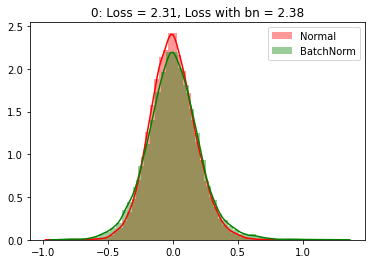

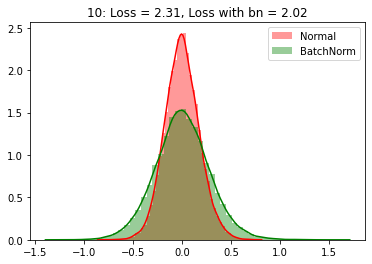

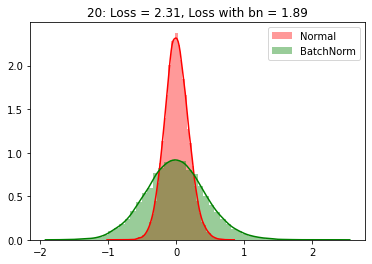

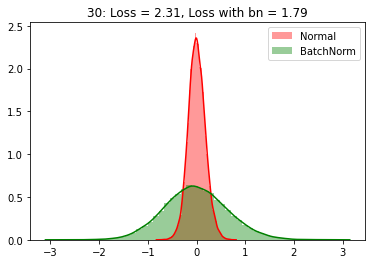

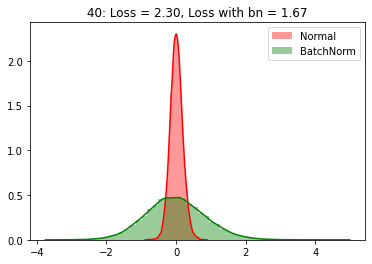

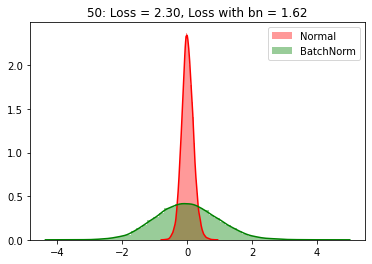

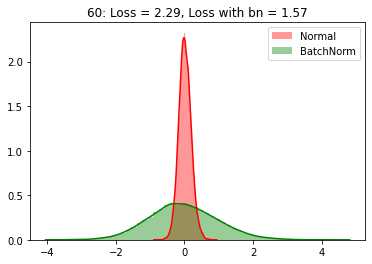

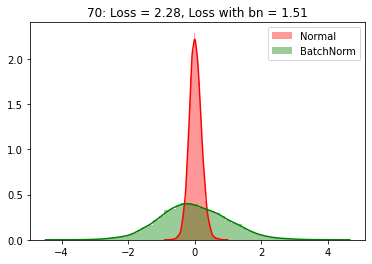

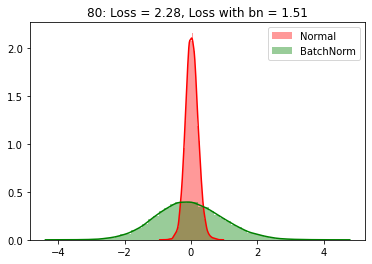

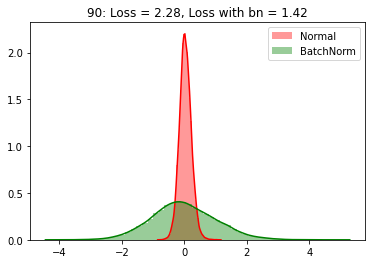

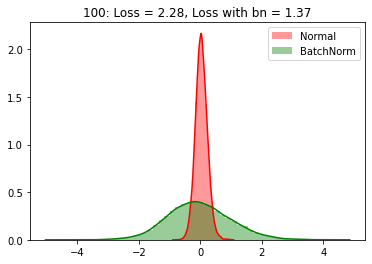

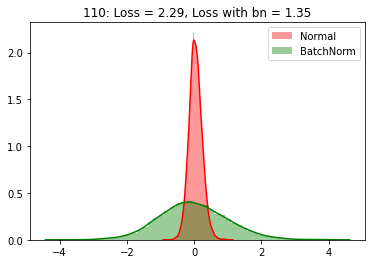

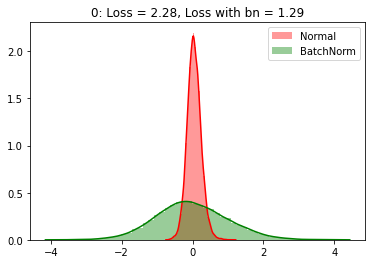

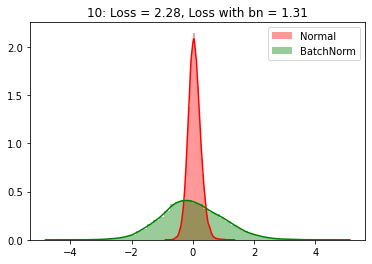

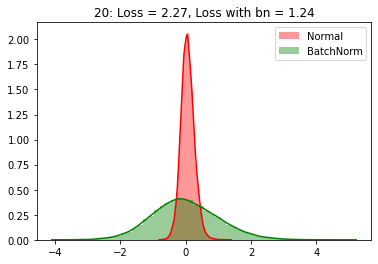

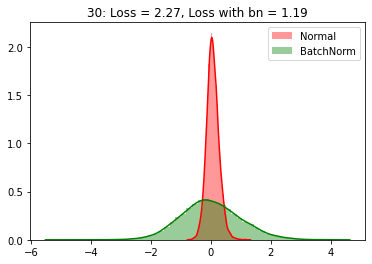

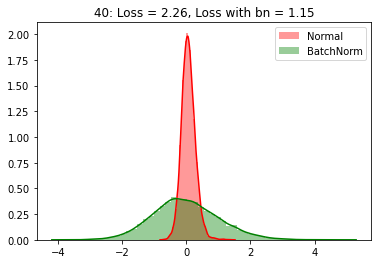

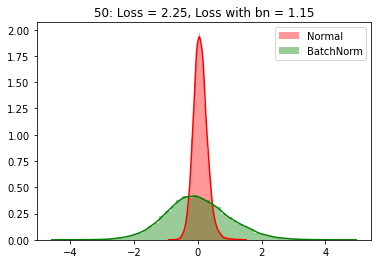

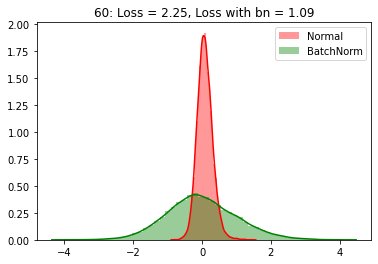

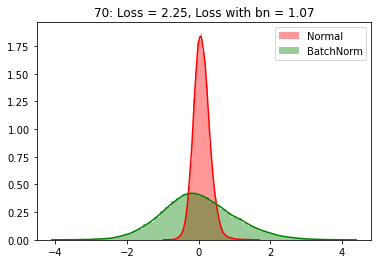

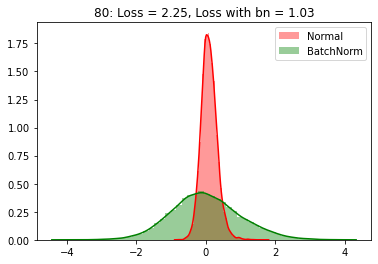

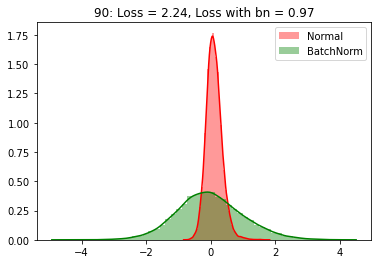

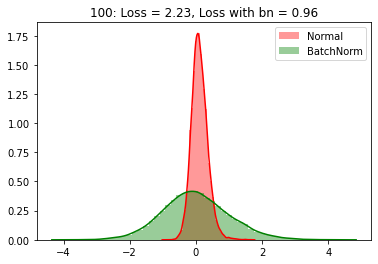

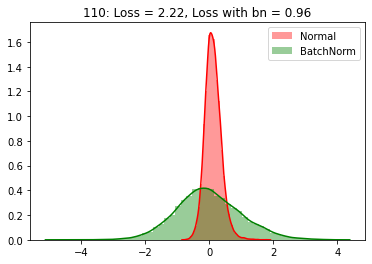

----------------------


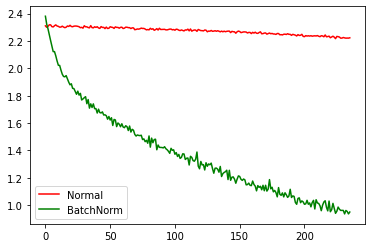

In [16]:
loss_arr = []
loss_bn_arr = []

max_epochs = 2


for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, labels = data



    # Training steps for normal model
    opt.zero_grad()
    outputs = model(inputs)              #forward pass
    loss = loss_fn(outputs, labels)   #compute loss
    loss.backward()                   #backward pass
    opt.step()                       #updating the weights

    # Training steps for BN model
    opt_bn.zero_grad()

    outputs_bn = model_bn(inputs)              #forward pass
    loss_bn = loss_fn(outputs_bn, labels)   #compute loss
    loss_bn.backward()                   #backward pass
    opt_bn.step()                       #updating the weights

    loss_arr.append(loss.item())
    loss_bn_arr.append(loss_bn.item())

    if i % 10 == 0:

      inputs = inputs.view(inputs.size(0), -1)

      model.eval()
      model_bn.eval()

      a = model.classifier[0](inputs)
     # a = model.classifier[1](a)
     # a = model.classifier[2](a)
      a = a.detach().numpy().ravel()
      sns.distplot(a, kde=True, color='r', label='Normal') 
            
      b = model_bn.classifier[0](inputs)
      b = model_bn.classifier[1](b)
     # b = model_bn.classifier[2](b)
     # b = model_bn.classifier[3](b)
     # b = model_bn.classifier[4](b)
      b = b.detach().numpy().ravel()
            
      sns.distplot(b, kde=True, color='g', label='BatchNorm') 
      plt.title('%d: Loss = %0.2f, Loss with bn = %0.2f' % (i, loss.item(), loss_bn.item()))
      plt.legend()
      plt.show()
      plt.pause(0.5)
            
      model.train()
      model_bn.train()
        
        
print('----------------------')
plt.plot(loss_arr, 'r', label='Normal')
plt.plot(loss_bn_arr, 'g', label='BatchNorm')
plt.legend()
plt.show()

# Batchnorm in CNN

In [17]:
class CNN_BM(nn.Module):
  def __init__(self):
    super(CNN_BM, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 3, 5),          # (N, 1, 28, 28) -> (N, 3, 24, 24)
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),   # (N, 3, 24, 24) -> (N, 3, 12, 12)
        nn.Conv2d(3, 6, 3), 
        nn.BatchNorm2d(6)            # (N, 3, 12, 12) -> (N, 6, 10, 10)
    )
    self.features1 = nn.Sequential(
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2)    # (N, 6, 10, 10) -> (N, 6, 5, 5)
    )
    self.classifier = nn.Sequential(
        nn.Linear(150, 25),          # (N, 150) -> (N, 25)
        nn.ReLU(),
        nn.Linear(25, 10)            # (N, 25) -> (N, 10)
    )

  def forward(self, x):
    x = self.features(x)
    x = self.features1(x)
    x = x.view(x.size(0), -1) 
    x = self.classifier(x)
    return x  

# Dropout 

In [20]:
N = 25
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1, 1, N),1)
Y_train = X_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))


X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_test = X_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

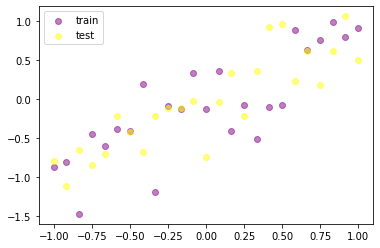

In [22]:
plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [36]:
N_h = 100

model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1)
)

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1)
)

In [37]:
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)

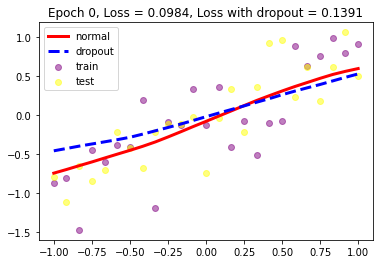

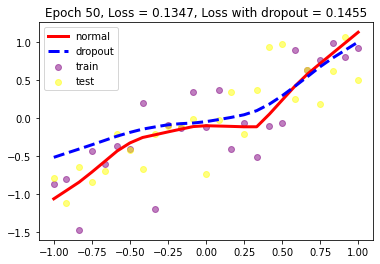

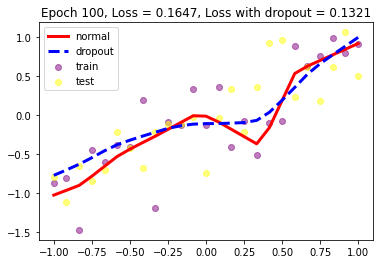

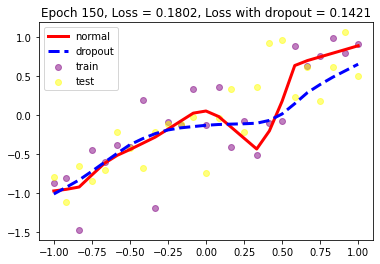

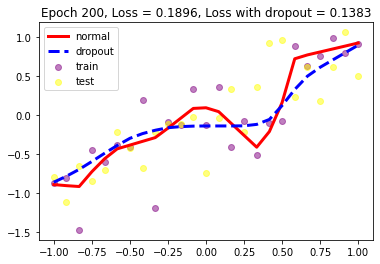

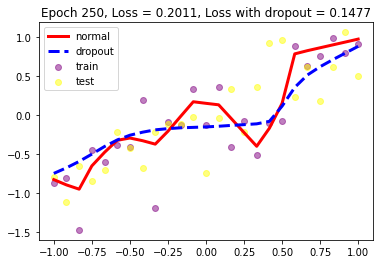

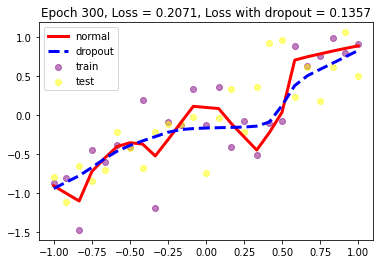

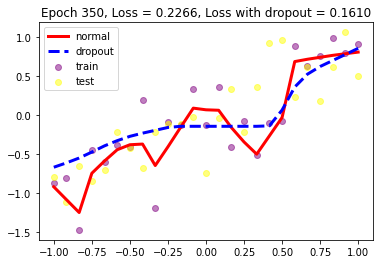

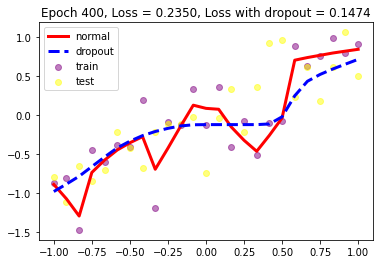

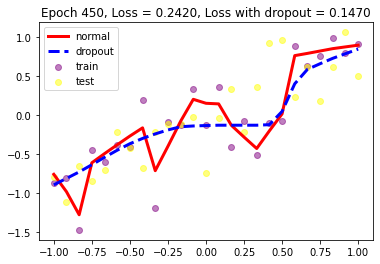

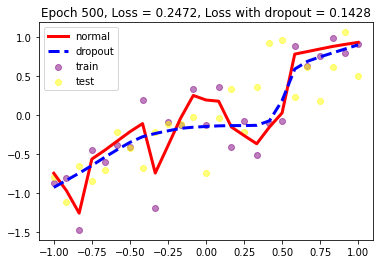

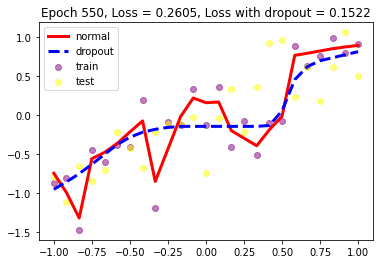

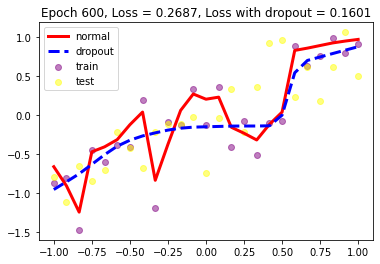

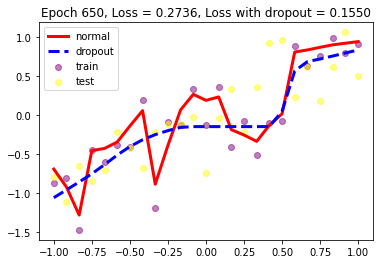

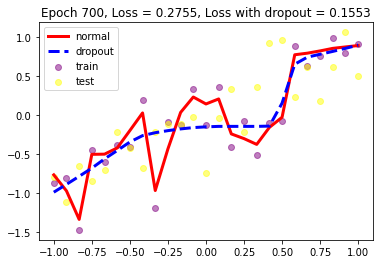

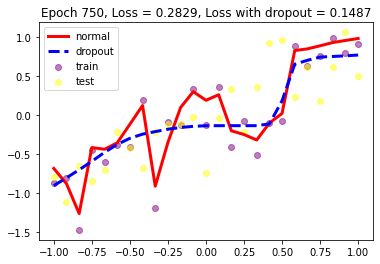

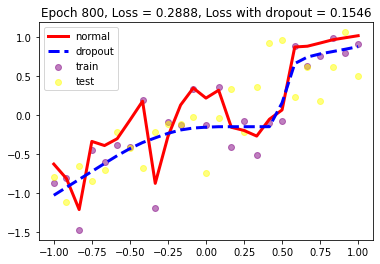

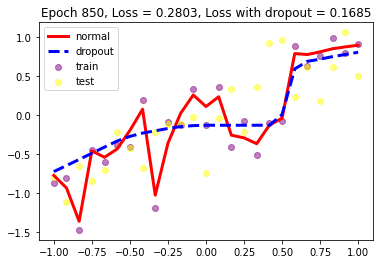

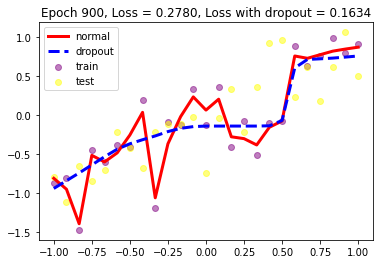

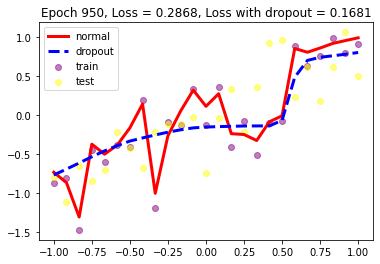

In [38]:
max_epochs = 1000

for epoch in range(max_epochs):


    pred = model(X_train)        # look at the entire data in a single shot       
    loss = loss_fn(pred, Y_train)   
    opt.zero_grad()
    loss.backward()                   
    opt.step()                       


    pred_dropout = model_dropout(X_train)              
    loss_dropout = loss_fn(pred_dropout, Y_train)  
    opt_dropout.zero_grad()
    loss_dropout.backward()                   
    opt_dropout.step()                       

    if epoch % 50 == 0:

      model.eval()
      model_dropout.eval()

      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, Y_test)

      test_pred_dropout = model_dropout(X_test)
      test_loss_dropout = loss_fn(test_pred_dropout, Y_test)
        
      plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
      plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
      plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
      plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3,  label='dropout')
        
      plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        
      plt.legend()

      model.train()
      model_dropout.train()
        
      plt.pause(0.05)


